### 랜덤포레스트
- 순서: 데이터 전처리 -> (반복: 학습 -> 결과 확인 -> 파라미터 조정) -> 모델 저장
- 서버에서는 저장된 모델을 불러와서 예측만 하기
- 현재 문제: 데이터 전처리 후 라벨 true 값이 너무 적음 -> 전처리 다시하기

#### https://www.datacamp.com/community/tutorials/random-forests-classifier-python

##### 1. 라이브러리 가져오기

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn import preprocessing

##### 2. 데이터셋 로드 -> 컬럼 추출

In [3]:
#Load dataset
temp = pd.read_csv("outFile.csv",engine='python',encoding='cp949')

In [4]:
#사용할 변수, 라벨만 추출
tmp = temp[["age", "sex", 
            "D_1_1","BO1_1", "BS3_1", "BS3_2", "HE_sput2", "BH2_61", "BE5_1","BD2_1",
            
            "HE_fh", "HE_HPfh1", "HE_HPfh2", "HE_HPfh3", "HE_HLfh1", "HE_HLfh2", "HE_HLfh3", "HE_IHDfh1", "HE_IHDfh2", "HE_IHDfh3",
            "HE_STRfh1", "HE_STRfh2", "HE_STRfh3", "HE_DMfh1", "HE_DMfh2", "HE_DMfh3", 
            "HE_HBfh1", "HE_HBfh2", "HE_HBfh3",
            
            "DI1_dg", "DI1_2", "DI2_dg", "DI2_2",
            "DI3_dg", "DI4_dg", "DJ2_dg", 
            "DE1_dg", "DE1_32", 
            "DC1_dg", "DC2_dg", "DC3_dg",  "DC6_dg", "DC7_dg", 
            "DJ8_dg", "DJ6_dg", 
            "DK8_dg", "DK9_dg","DJ4_dg", 
            "EC_wht_23", "Total_slp_wk", "Total_slp_wd",
            "BP1", "BE3_33","HE_BMI",
            "DK4_dg"]]
print(len(tmp.columns))

55


In [5]:
mean_round= ["HE_sput2", "HE_BMI", "EC_wht_23", 
             "Total_slp_wk", "Total_slp_wd", "BE3_33"]

drop_col = ["DK4_dg"]
nine_nine_nine = [ "BS3_2"]
nine= ["D_1_1","BO1_1", "BS3_1","BH2_61", "BE5_1",
        "BD2_1",
        "HE_fh", "HE_HPfh1", "HE_HPfh2", "HE_HPfh3", "HE_HLfh1", "HE_HLfh2", "HE_HLfh3", "HE_IHDfh1", "HE_IHDfh2", "HE_IHDfh3",
        "HE_STRfh1", "HE_STRfh2", "HE_STRfh3", "HE_DMfh1", "HE_DMfh2", "HE_DMfh3", 
        "HE_HBfh1", "HE_HBfh2", "HE_HBfh3", 
        "DI1_dg", "DI1_2", "DI2_dg", "DI2_2", "DI3_dg", "DI4_dg", "DJ2_dg", "DE1_dg", "DE1_32", 
     "DC2_dg", "DC3_dg", "DC7_dg", "DJ8_dg", "DJ6_dg",
        "DK8_dg", "DK9_dg", "DJ4_dg", "BP1", "DC1_dg"]

##### 3. 데이터 전처리
- 모름/무응답 행 제거
- 중복 값 처리
- 컬럼 합치기
- null 처리 된 0 복원 등

In [6]:
for i in nine_nine_nine:
    tmp[i].fillna(999, inplace = True)  #null 대체
    
for i in nine:
    tmp[i].fillna(999, inplace = True)  #null 대체
    
for i in mean_round:
    tmp[i] =tmp[i].fillna((round(tmp[i].mean(),0)))
    
tmp = tmp.dropna(how='any',axis=0) #null  제거
tmp[:] = np.nan_to_num(tmp)

In [7]:
#고혈압
tmp['HE_HPfh'] = 0
tmp.loc[tmp.HE_HPfh1 == 1, 'HE_HPfh'] = 1
tmp.loc[tmp.HE_HPfh1 == 8, 'HE_HPfh'] = 8
tmp.loc[tmp.HE_HPfh1 == 9, 'HE_HPfh'] = 9
tmp.loc[tmp.HE_HPfh2 == 1, 'HE_HPfh'] = 1
tmp.loc[tmp.HE_HPfh2 == 8, 'HE_HPfh'] = 8
tmp.loc[tmp.HE_HPfh2 == 9, 'HE_HPfh'] = 9
tmp.loc[tmp.HE_HPfh3 == 1, 'HE_HPfh'] = 1
tmp.loc[tmp.HE_HPfh3 == 8, 'HE_HPfh'] = 8
tmp.loc[tmp.HE_HPfh3 == 9, 'HE_HPfh'] = 9
del tmp['HE_HPfh1']
del tmp['HE_HPfh2']
del tmp['HE_HPfh3']

#고지혈증
tmp['HE_HLfh'] = 0
tmp.loc[tmp.HE_HLfh1 == 1, 'HE_HLfh'] = 1
tmp.loc[tmp.HE_HLfh1 == 8, 'HE_HLfh'] = 8
tmp.loc[tmp.HE_HLfh1 == 9, 'HE_HLfh'] = 9
tmp.loc[tmp.HE_HLfh2 == 1, 'HE_HLfh'] = 1
tmp.loc[tmp.HE_HLfh2 == 8, 'HE_HLfh'] = 8
tmp.loc[tmp.HE_HLfh2 == 9, 'HE_HLfh'] = 9
tmp.loc[tmp.HE_HLfh3 == 1, 'HE_HLfh'] = 1
tmp.loc[tmp.HE_HLfh3 == 8, 'HE_HLfh'] = 8
tmp.loc[tmp.HE_HLfh3 == 9, 'HE_HLfh'] = 9
del tmp['HE_HLfh1']
del tmp['HE_HLfh2']
del tmp['HE_HLfh3']

#허혈성심장질환
tmp['HE_IHDfh'] = 0
tmp.loc[tmp.HE_IHDfh1 == 1, 'HE_IHDfh'] = 1
tmp.loc[tmp.HE_IHDfh1 == 8, 'HE_IHDfh'] = 8
tmp.loc[tmp.HE_IHDfh1 == 9, 'HE_IHDfh'] = 9
tmp.loc[tmp.HE_IHDfh2 == 1, 'HE_IHDfh'] = 1
tmp.loc[tmp.HE_IHDfh2 == 8, 'HE_IHDfh'] = 8
tmp.loc[tmp.HE_IHDfh2 == 9, 'HE_IHDfh'] = 9
tmp.loc[tmp.HE_IHDfh3 == 1, 'HE_IHDfh'] = 1
tmp.loc[tmp.HE_IHDfh3 == 8, 'HE_IHDfh'] = 8
tmp.loc[tmp.HE_IHDfh3 == 9, 'HE_IHDfh'] = 9
del tmp['HE_IHDfh1']
del tmp['HE_IHDfh2']
del tmp['HE_IHDfh3']

#뇌졸중
tmp['HE_STRfh'] = 0
tmp.loc[tmp.HE_STRfh1 == 1, 'HE_STRfh'] = 1
tmp.loc[tmp.HE_STRfh1 == 8, 'HE_STRfh'] = 8
tmp.loc[tmp.HE_STRfh1 == 9, 'HE_STRfh'] = 9
tmp.loc[tmp.HE_STRfh2 == 1, 'HE_STRfh'] = 1
tmp.loc[tmp.HE_STRfh2 == 8, 'HE_STRfh'] = 8
tmp.loc[tmp.HE_STRfh2 == 9, 'HE_STRfh'] = 9
tmp.loc[tmp.HE_STRfh3 == 1, 'HE_STRfh'] = 1
tmp.loc[tmp.HE_STRfh3 == 8, 'HE_STRfh'] = 8
tmp.loc[tmp.HE_STRfh3 == 9, 'HE_STRfh'] = 9
del tmp['HE_STRfh1']
del tmp['HE_STRfh2']
del tmp['HE_STRfh3']

#당뇨병
tmp['HE_DMfh'] = 0
tmp.loc[tmp.HE_DMfh1 == 1, 'HE_DMfh'] = 1
tmp.loc[tmp.HE_DMfh1 == 8, 'HE_DMfh'] = 8
tmp.loc[tmp.HE_DMfh1 == 9, 'HE_DMfh'] = 9
tmp.loc[tmp.HE_DMfh2 == 1, 'HE_DMfh'] = 1
tmp.loc[tmp.HE_DMfh2 == 8, 'HE_DMfh'] = 8
tmp.loc[tmp.HE_DMfh2 == 9, 'HE_DMfh'] = 9
tmp.loc[tmp.HE_DMfh3 == 1, 'HE_DMfh'] = 1
tmp.loc[tmp.HE_DMfh3 == 8, 'HE_DMfh'] = 8
tmp.loc[tmp.HE_DMfh3 == 9, 'HE_DMfh'] = 9
del tmp['HE_DMfh1']
del tmp['HE_DMfh2']
del tmp['HE_DMfh3']

#B형간염 
tmp['HE_HBfh'] = 0
tmp.loc[tmp.HE_HBfh1 == 1, 'HE_HBfh'] = 1
tmp.loc[tmp.HE_HBfh1 == 8, 'HE_HBfh'] = 8
tmp.loc[tmp.HE_HBfh1 == 9, 'HE_HBfh'] = 9
tmp.loc[tmp.HE_HBfh2 == 1, 'HE_HBfh'] = 1
tmp.loc[tmp.HE_HBfh2 == 8, 'HE_HBfh'] = 8
tmp.loc[tmp.HE_HBfh2 == 9, 'HE_HBfh'] = 9
tmp.loc[tmp.HE_HBfh3 == 1, 'HE_HBfh'] = 1
tmp.loc[tmp.HE_HBfh3 == 8, 'HE_HBfh'] = 8
tmp.loc[tmp.HE_HBfh3 == 9, 'HE_HBfh'] = 9
del tmp['HE_HBfh1']
del tmp['HE_HBfh2']
del tmp['HE_HBfh3']


In [8]:
print(temp.DK4_dg.isnull().value_counts())
print(tmp.DK4_dg.isnull().value_counts())
print(tmp.DK4_dg.value_counts())

False    7699
True      428
Name: DK4_dg, dtype: int64
False    7699
Name: DK4_dg, dtype: int64
0.0    5827
8.0    1509
9.0     340
1.0      23
Name: DK4_dg, dtype: int64


##### 4. feature, label 지정

In [28]:
from sklearn.model_selection import train_test_split

feature_cols = ["age",
            "D_1_1","BO1_1", "BS3_1", "BH2_61", "BE5_1","BD2_1",
            
            "HE_fh", "HE_HPfh", "HE_HLfh",
            "HE_STRfh", 
            "HE_HBfh",
            
            "DI1_dg", "DI1_2", "DI2_dg", "DI2_2",
        
            "DK8_dg", "DK9_dg",
            "EC_wht_23", "Total_slp_wk", "Total_slp_wd",
            "BP1", "BE3_33","HE_BMI"]
            


X = tmp[feature_cols] # Features
y = tmp.DK4_dg # Target variable

##### 5. train, test data 나누기
- 70% training, 30% test

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

##### 6. 트리 생성
- 학습 및 정확도 
- percentage: predict_proba
- classification: predict
- 정확도 함수: https://scikit-learn.org/stable/modules/model_evaluation.html

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)#Create a Gaussian Classifier
clf.fit(x_train,y_train) #train model
y_pred=clf.predict(x_test)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#rfc_cv_score = cross_val_score(clf, X, y, cv=10, scoring="roc_auc")

print("=== Confusion Matrix ===") #true positive/ false negative/ false positive/ true nagative
print(confusion_matrix(y_test, y_pred)) #evaluate the accuracy of a classification
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn import preprocessing

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("auc: ", multiclass_roc_auc_score(y_test, y_pred))


=== Confusion Matrix ===
[[1767    0    0    0]
 [   4    0    0    0]
 [   0    0  432    0]
 [   0    0    0  107]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1767
        1.0       0.00      0.00      0.00         4
        8.0       1.00      1.00      1.00       432
        9.0       1.00      1.00      1.00       107

avg / total       1.00      1.00      1.00      2310



Accuracy:  0.9982683982683983
auc:  0.8740791896869244


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### 7. 생성된 트리 시각화 및 주요 특성 확인

In [34]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
#print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), feature_cols), 
#             reverse=True))
feature_imp
#print(len(clf.feature_importances_))

DK8_dg          0.180057
DK9_dg          0.165096
BH2_61          0.162464
age             0.098252
DI2_dg          0.067063
BO1_1           0.066902
DI1_dg          0.053600
Total_slp_wd    0.050206
Total_slp_wk    0.041231
BE5_1           0.039721
BP1             0.020651
EC_wht_23       0.018922
BE3_33          0.015734
D_1_1           0.008543
BD2_1           0.004506
HE_BMI          0.002808
BS3_1           0.001391
HE_HBfh         0.000588
DI1_2           0.000563
HE_HPfh         0.000524
HE_fh           0.000375
HE_STRfh        0.000345
DI2_2           0.000236
HE_HLfh         0.000223
dtype: float64

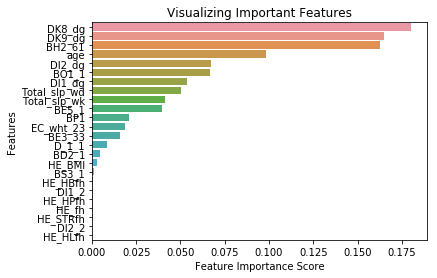

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

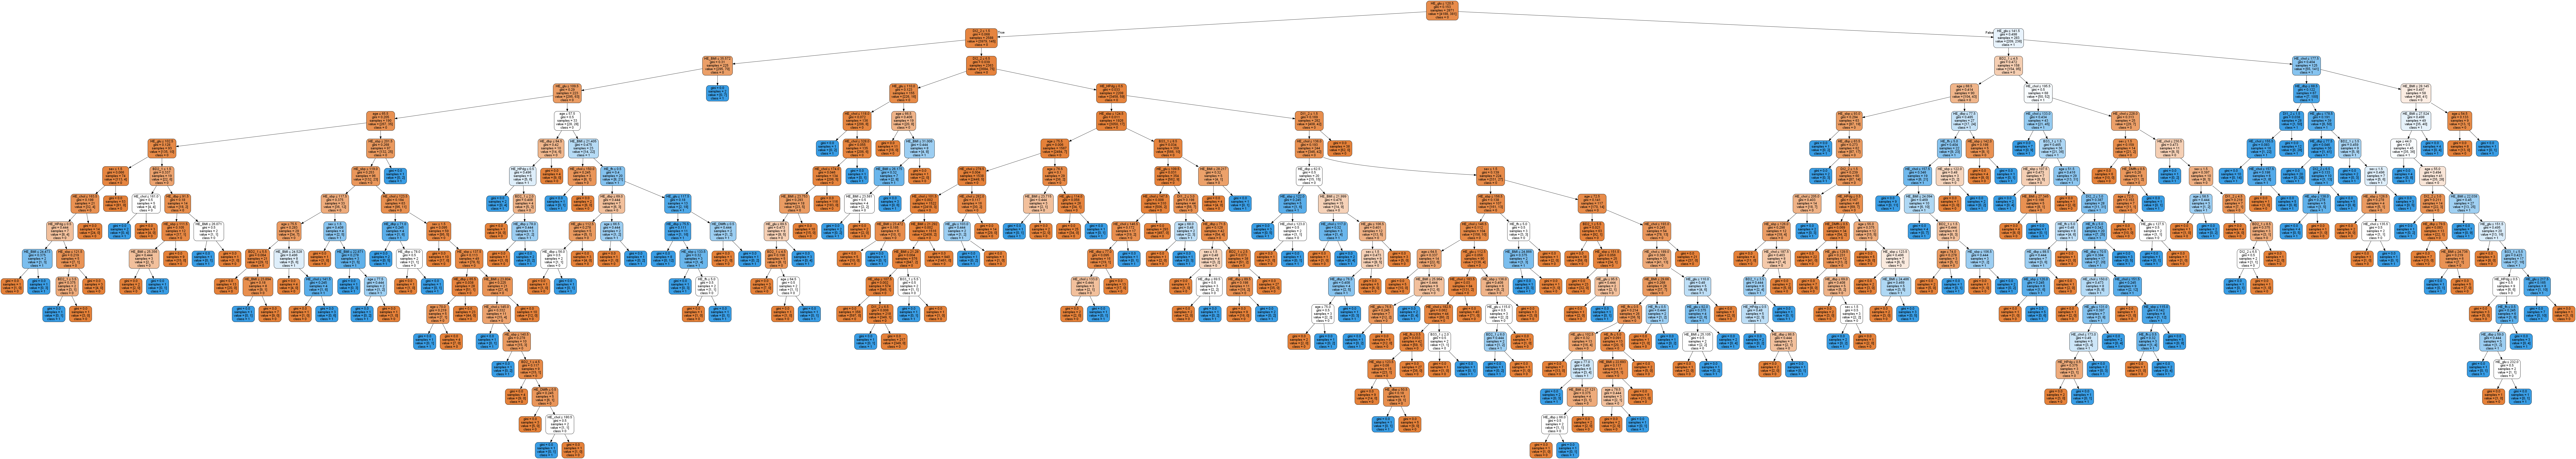

In [37]:
dot_data = StringIO()
export_graphviz(clf.estimators_[1], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_diabetes.png')
Image(graph.create_png())

##### 8. 파라미터 조정

In [17]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 15)]
#n_estimators=[20, 30, 40, 50, 60, 70]
max_features = [int(x) for x in np.linspace(start = 1, stop = 90, num = 90)]
max_features.append('log2')
max_features.append(None)
max_features.append('auto')
max_features.append('sqrt')

max_depth = [int(x) for x in np.linspace(start = 1, stop = 90, num = 90)]
#max_depth = [5, 7, 10, 15]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
               50,
               51,
           

In [18]:
from sklearn.model_selection import GridSearchCV

# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, n_iter = 100, cv = 3, verbose=2)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'n_estimators': [10, 23, 37, 50, 64, 77, 91, 105, 118, 132, 145, 159, 172, 186, 200], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4..., 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, None], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', ra

In [19]:
print(rf_random.best_params_)

{'n_estimators': 10, 'max_features': 27, 'max_depth': 86, 'bootstrap': False}


- 추출한 파라미터 평가
- 참고: https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

In [20]:
opti_model = RandomForestClassifier(n_estimators=10, max_features=27, max_depth = 86, bootstrap=False )
opti_model.fit(x_train,y_train) #train model
y_pred=opti_model.predict(x_test)

In [21]:
print("=== Confusion Matrix ===") #true positive/ false negative/ false positive/ true nagative
print(confusion_matrix(y_test, y_pred)) #evaluate the accuracy of a classification
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("auc: ", multiclass_roc_auc_score(y_test, y_pred))


=== Confusion Matrix ===
[[1732    0    0    0]
 [   5    0    0    0]
 [   0    0  475    0]
 [   0    1    0   97]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1732
        1.0       0.00      0.00      0.00         5
        8.0       1.00      1.00      1.00       475
        9.0       1.00      0.99      0.99        98

avg / total       1.00      1.00      1.00      2310

Accuracy:  0.9974025974025974
auc:  0.8725889449821016


In [137]:
y_pred=opti_model.predict_proba(x_test)
#print(y_pred)
import math
window_data  = np.array(y_pred)
for i in range(len(window_data)):
    print(round(window_data[i][0], 2), ", ", round(window_data[i][1], 2))


0.11 ,  0.89
0.24 ,  0.76
0.11 ,  0.89
0.97 ,  0.03
0.16 ,  0.84
0.14 ,  0.86
1.0 ,  0.0
0.95 ,  0.05
1.0 ,  0.0
1.0 ,  0.0
0.16 ,  0.84
1.0 ,  0.0
0.95 ,  0.05
0.16 ,  0.84
0.11 ,  0.89
0.11 ,  0.89
0.95 ,  0.05
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.08 ,  0.92
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
0.05 ,  0.95
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.16 ,  0.84
0.11 ,  0.89
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.08 ,  0.92
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
0.97 ,  0.03
0.97 ,  0.03
0.08 ,  0.92
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
0.11 ,  0.89
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
0.92 ,  0.08
0.19 ,  0.81
0.46 ,  0.54
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.92 ,  0.08
0.97 ,  0.03
1.0 , 

1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
0.97 ,  0.03
0.81 ,  0.19
0.97 ,  0.03
0.97 ,  0.03
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
0.92 ,  0.08
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.95 ,  0.05
1.0 ,  0.0
0.95 ,  0.05
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.14 ,  0.86
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.92 ,  0.08
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.62 ,  0.38
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.89 ,  0.11
0.11 ,  0.89
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.95 ,  0.05
0.92 ,  0.08
0.97 ,  0.03
1.0 ,  0.0
0.11 ,  0.89
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.08 ,  0.92
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
0.97 ,  0.03
0.97 ,  0.03
1.0 ,  0.0
0.97 ,  0.03
0.95 ,  0.05
1.0 ,  0.0
0.84 ,  0.16
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
0.9

1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.22 ,  0.78
0.95 ,  0.05
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.05 ,  0.95
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.92 ,  0.08
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
0.97 ,  0.03
1.0 ,  0.0
0.95 ,  0.05
0.05 ,  0.95
1.0 ,  0.0
1.0 ,  0.0
0.86 ,  0.14
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
0.97 ,  0.03
0.84 ,  0.16
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
0.95 ,  0.05
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
0.08 ,  0.92
1.0 ,  0.0
0.05 ,  0.95
0.92 ,  0.08
0.92 ,  0.08
0.73 ,  0.27
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.86 ,  0.14
0.97 ,  0.03
1.0 ,  0.0
1.0 ,  0.0
1.0 ,  0.0
0.97 ,  0.03
0.95 ,  0.05
0.08 ,  0.92
1.0 ,  0.0
0.97 ,  0.03
1.0 ,  0.0
0.03 ,  0.97
1.0 ,  0.0
0.89 ,  0.11
1.0 ,  0.0
1.0 ,  0.0
0.05 ,  0.95
1.0 ,  0.0
0.86 ,  0.14
1.0 ,  0.0
0.08 ,  0.92
1.0 ,  0.0
0.03 ,  0.97
1

##### 9. 모델 저장 및 저장된 모델 불러와서 테스트하기
- ***** 서버측에서 머신러닝 사용시 모델만 불러와서 사용하면 된다.*****
- 참고: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [26]:
import pickle
# 모델 저장
filename = 'randomtree_diabetes.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# 모델 불러오기
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)

In [27]:
result

0.9556931872320152

##### AUC Graph

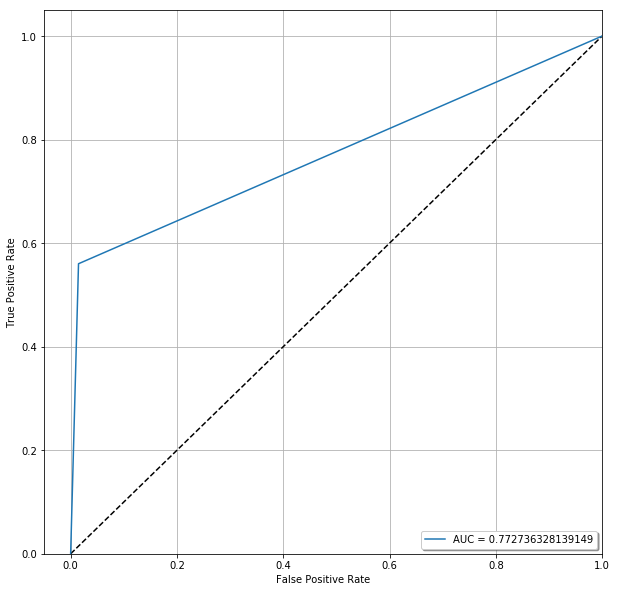

In [31]:
# overall accuracy
acc = clf.score(x_test,y_test)

# get roc/auc info
Y_score = clf.predict_proba(x_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()